# Exploratory Data Analysis (EDA)

## Import Data & Overview

### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/MRE/Documents/GitHub/Water_Qualityy/water_potability.csv")

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Initial Overview

In [2]:
data.shape

(3276, 10)

### Column Names and Data Types

In [3]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Summary Statistics

In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Checking for Missing Values

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Handling Missing Values

In [6]:
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Feature Distribution

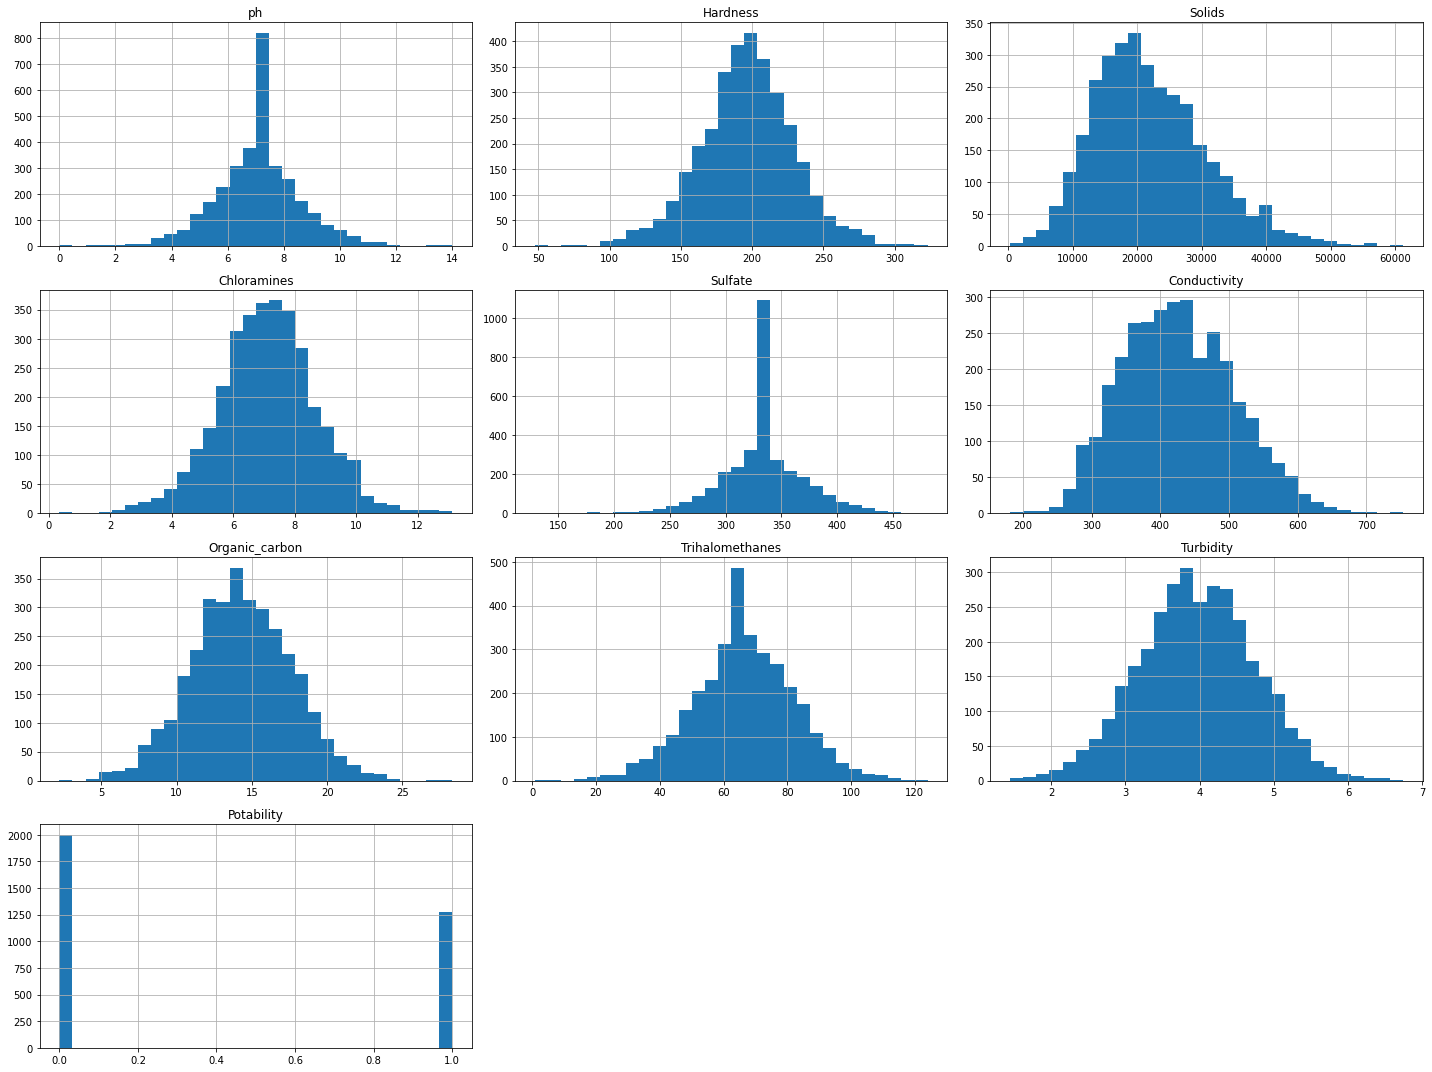

In [7]:
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()


### Outlier Analysis

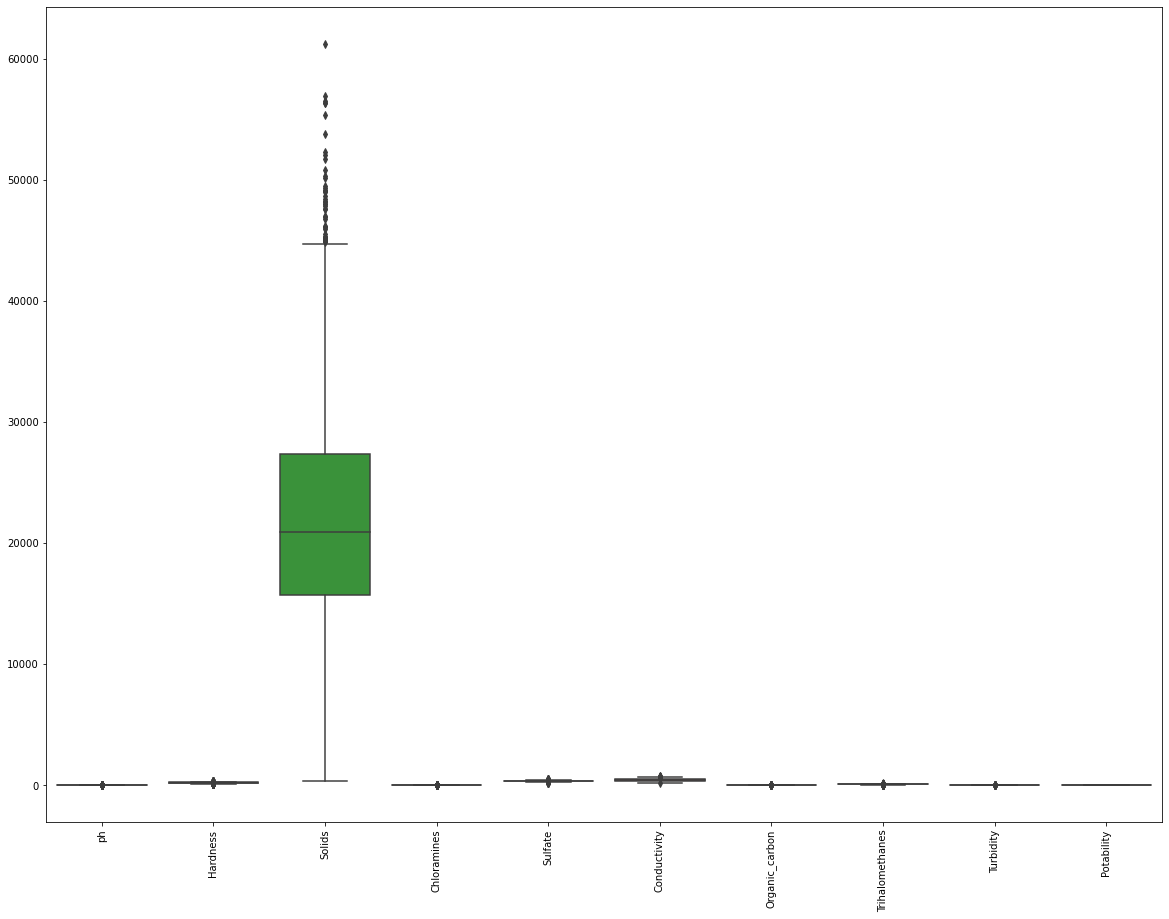

In [8]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.xticks(rotation = 90)
plt.show()

### Outlier Analysis for Individual Features

C:\Users\MRE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MRE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MRE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MRE\anaconda3\lib\site-packa

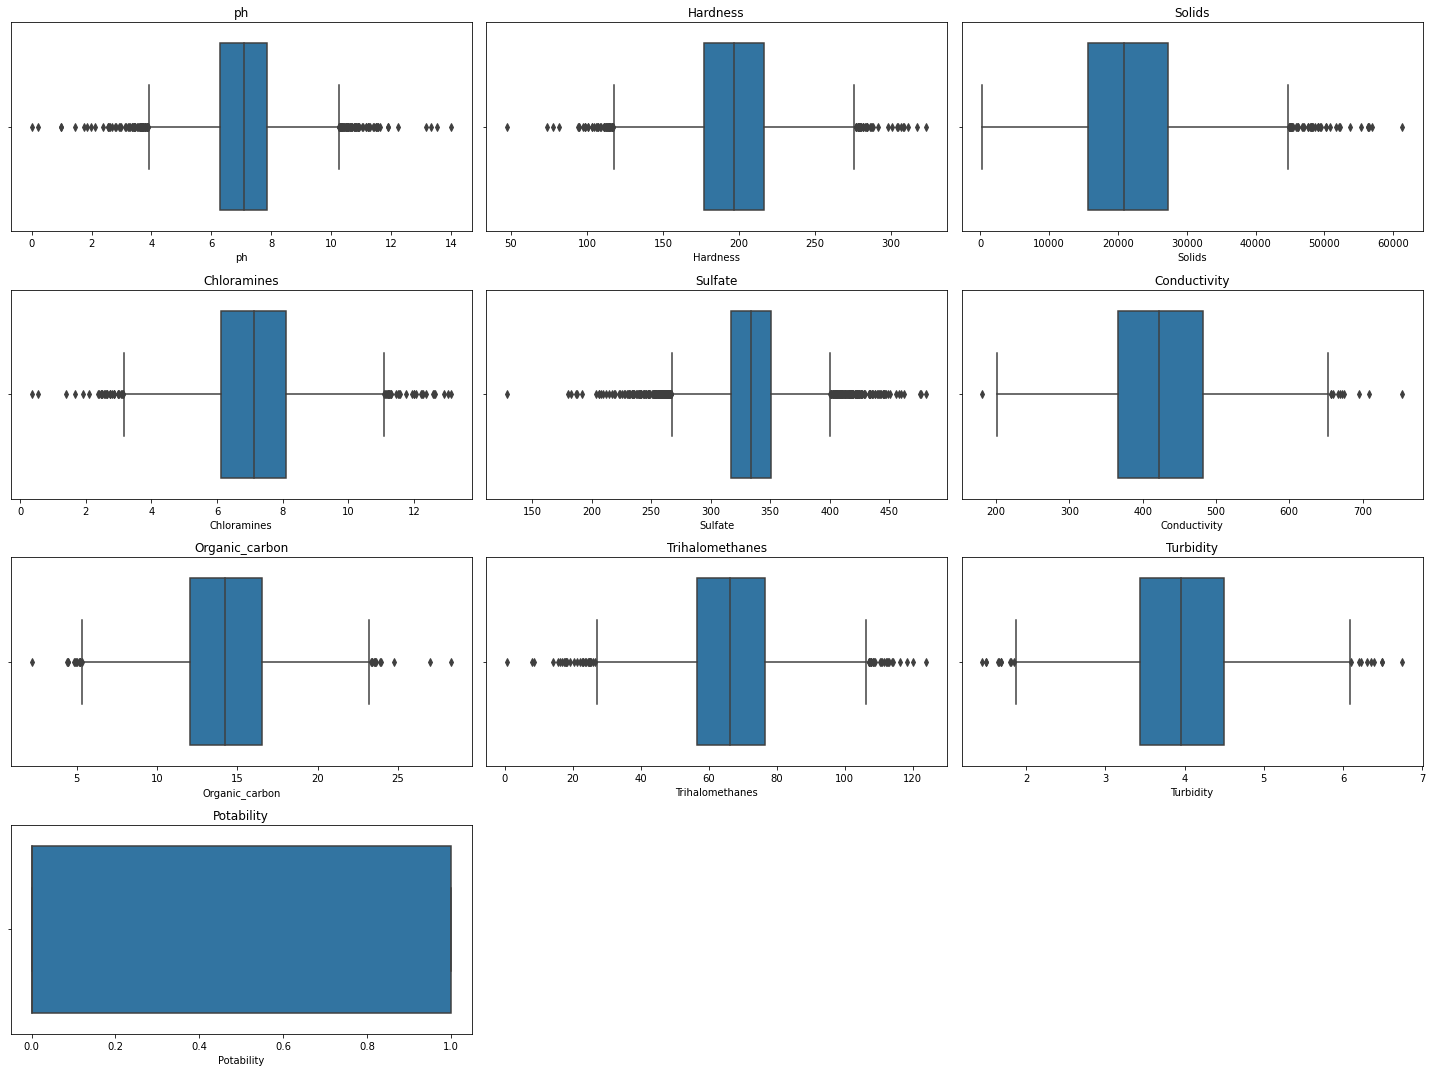

In [9]:
features = data.columns
plt.figure(figsize= (20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

### Bivariate Analysis

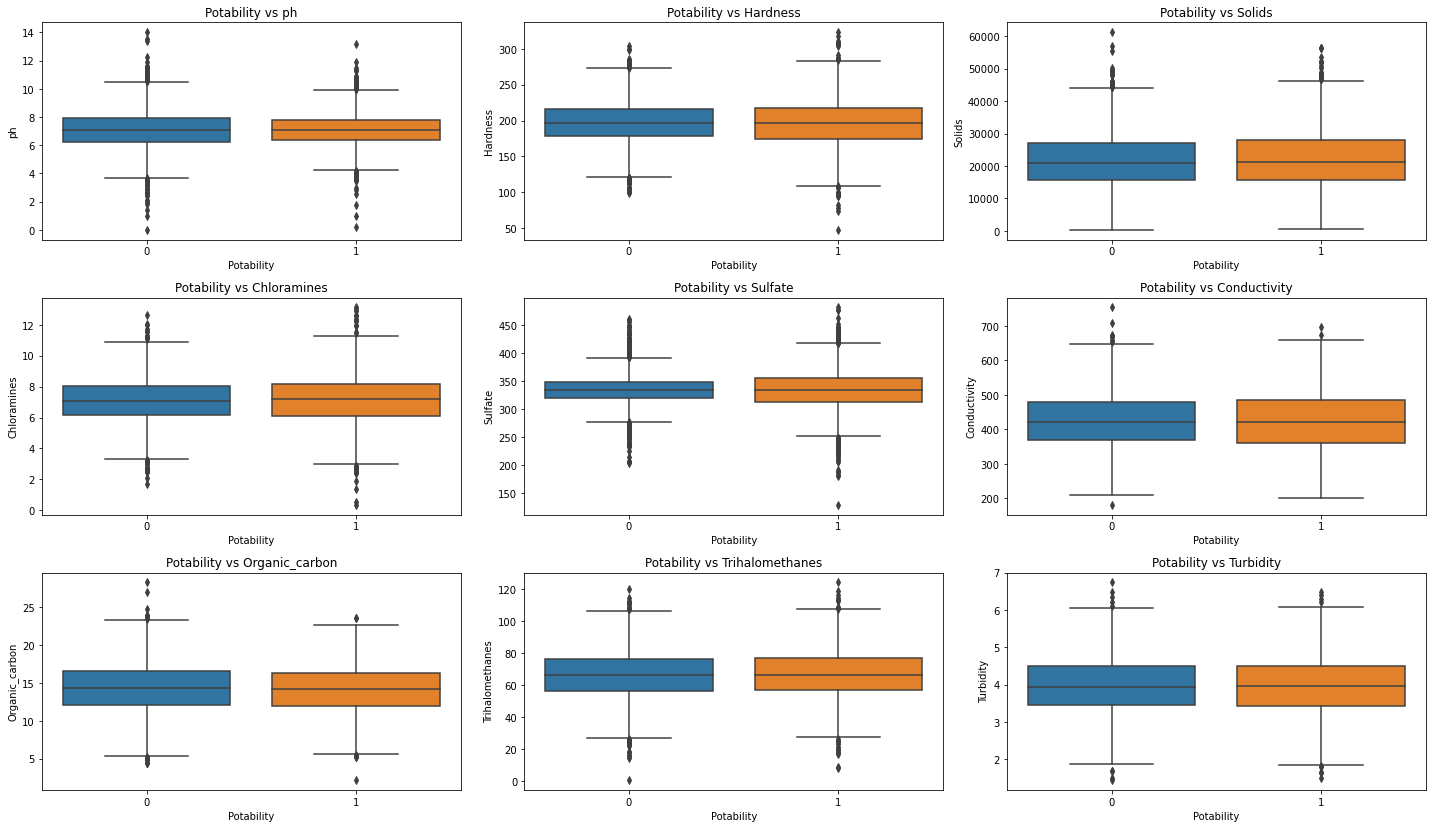

In [10]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features[:-1], 1):  # Except Potability feature
    plt.subplot(4, 3, i)
    sns.boxplot(x='Potability', y=feature, data=data)
    plt.title(f'Potability vs {feature}')
plt.tight_layout()
plt.show()

## Correlation Analysis

### Correlation Matrix

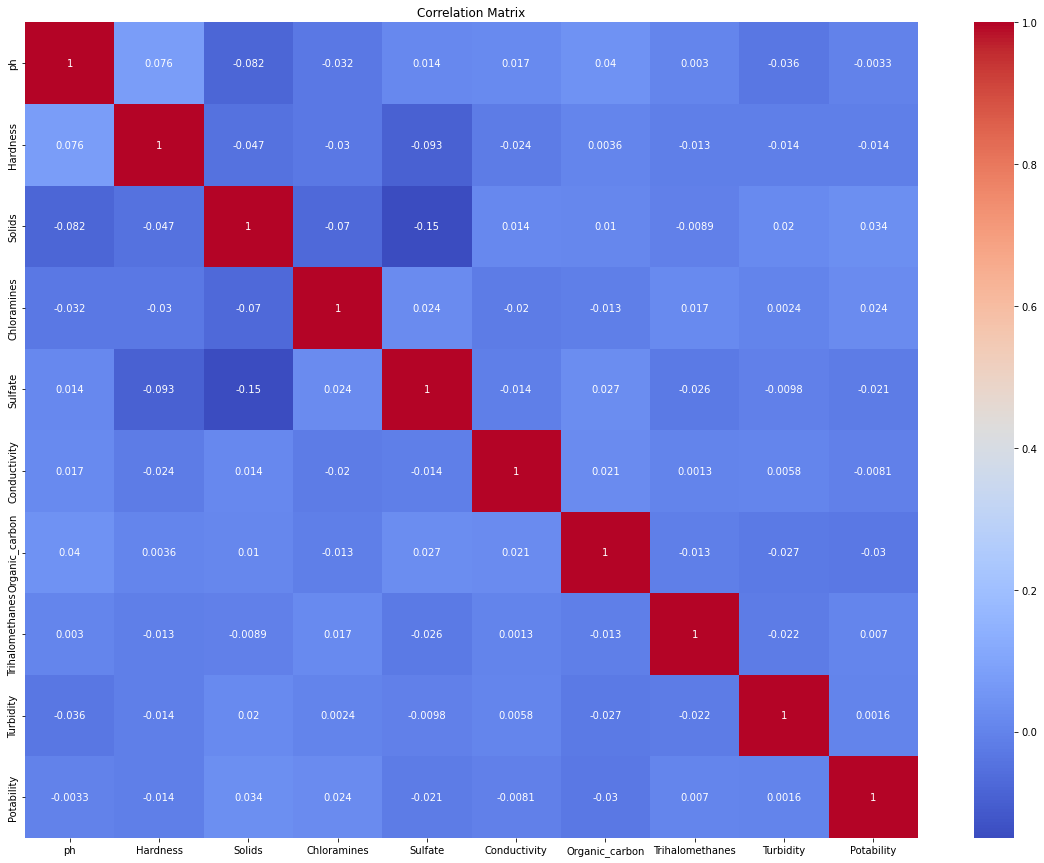

In [11]:
corr_matrix = data.corr()

plt.figure(figsize=(20,15))

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Train-Test Split & Normalization

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Potability', axis = 1)
y = data['Potability']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Normalization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Checking results
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2620, 9)
X_test shape: (656, 9)
y_train shape: (2620,)
y_test shape: (656,)


## Modelling

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#DTC Modelling
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Prediction
y_pred = dt_model.predict(X_test)

#Performance Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[255 157]
 [120 124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656


Accuracy Score:
0.5777439024390244


### Hyperparameter Tuning with Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter Grid for DTC
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}


#DTC Modelling
dt_model = DecisionTreeClassifier(random_state = 42)

#Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator = dt_model,
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    scoring = 'accuracy'
)

# Appyling GridSearch on Train Data
grid_search.fit(X_train, y_train)

# For the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Applying with Best of's on Train Data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Performance Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.6458015267175573
Confusion Matrix:
[[352  60]
 [174  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       412
           1       0.54      0.29      0.37       244

    accuracy                           0.64       656
   macro avg       0.60      0.57      0.56       656
weighted avg       0.62      0.64      0.61       656


Accuracy Score:
0.6432926829268293


<p>Despite the expanded hyperparameter grid, we see that the best parameters and model performance are the same as previous results. This indicates that the current hyperparameter range is sufficient and we should try other methods to further improve the performance of the model.</p>

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

#Hyperparameter Grid for Random Forest Model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#Random Forest Model
rf_model = RandomForestClassifier(random_state = 42)

# Hyperparameter Tuning with GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid = param_grid_rf,
    cv = 5,
    n_jobs = 1,
    scoring = 'accuracy'
)

# Execure the grid on train data
grid_search_rf.fit(X_train, y_train)

# Getting best parameters and scores
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_score_rf}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.682442748091603


### Model Evaluation with Best Model

In [16]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

#Performance Evaluation
# Performans değerlendirmesi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[361  51]
 [161  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.66      0.68      0.65       656


Accuracy Score:
0.676829268292683


<p> <b>Conclusion:</b>
Improvement: Random Forest model performed better compared to Decision Tree model. The overall accuracy rate and the rate of correctly predicting potable water (recall) have increased.
Weakness: The rate of correctly predicting potable water is still low, but the Random Forest model gave better results than Decision Tree in this regard.</p>

### Expanding Hyperparameter Settings

In [17]:
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'criterion': ['gini', 'entropy']
# }

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}

rf_model = RandomForestClassifier(random_state = 42)

grid_search_rf = GridSearchCV(
    estimator = rf_model,
    param_grid = param_grid_rf,
    cv = 5,
    n_jobs = 1,
    scoring = 'accuracy'
)

grid_search_rf.fit(X_train, y_train)

# For the best Parameter & Scores
best_params_rf = grid_search_rf.best_params_
best_scores_rf = grid_search_rf.best_score_

print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_score_rf}")

# Implementing with best estimators
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

#Performance Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.682442748091603
Confusion Matrix:
[[361  51]
 [161  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.66      0.68      0.65       656


Accuracy Score:
0.676829268292683


<p>When we examine the results, we see that they are the same as the previous results. This shows that the performance of our model is limited even with the extended hyperparameter grid.</p>

## Logistic Regression Classifier

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Logistic Regression Model
log_reg_model = LogisticRegression(random_state = 42, solver = 'liblinear')

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Hyperparameter Settings with GridSearchCV
grid_search_lr = GridSearchCV(
    estimator = log_reg_model,
    param_grid = param_grid_lr,
    cv = 5,
    n_jobs = 1,
    scoring = 'accuracy'
)

grid_search_lr.fit(X_train, y_train)

# For the best Parameter & Scores
best_params_lr = grid_search_lr.best_params_
best_scores_lr = grid_search_lr.best_score_

print(f"Best Parameters: {best_params_lr}")
print(f"Best Cross-Validation Accuracy: {best_scores_lr}")

# Implementing with best estimators
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lr))


Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.6057251908396947
Confusion Matrix:
[[412   0]
 [244   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


Accuracy Score:
0.6280487804878049


C:\Users\MRE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MRE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MRE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p>These results show that the Logistic Regression model cannot accurately predict potable water (Class 1) in the data set.</p>

<p>General evaluation:</p>
<p>Decision Tree Classifier: Performed moderately. It remained weak in its definitions of potable water.</p>
<p>Random Forest Classifier: Achieved the highest accuracy ranges, but still performed poorly at identifying potable water.</p>
<p>Logistic Regression: Potable water was never identified due to class imbalance. This model showed poor performance.</p>

## Prediction of New Water Source Potability

<p>In this section, it is estimated whether the new water source is drinkable or not by using the best performing Random Forest model. The property values ​​of the new water source will be given to the model and the model's predictions will be written.</p>

In [19]:
# New Water
new_water_source = [[7.2, 150, 20000, 6, 300, 400, 15, 60, 3]]

# Prediction with best model which is Random Forest
prediction = best_model_rf.predict(new_water_source)

# Prediction Result
if prediction[0] == 1:
    print("New water source is potable.")
else:
    print("New water source is inpotable")

New water source is potable.
